In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/DLCVNLP course/Perceptron from scratch')

In [4]:
os.getcwd()

'/content/drive/MyDrive/DLCVNLP course/Perceptron from scratch'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

plt.style.use("fivethirtyeight")

# **Perceptron Weight Rule**

1.   z = Summation(x1w1 + x2w2+ Bias(w0x0))   => y = mx + c
2.   activationFunction = O(z)    =>  if > 0 then 1 else 0

Perceptron Weight Rule (Updating Rule) = older weight + Learning rate * (y-y_hat) * Xi

In [132]:
class Perceptron:

  def __init__(self, alpha, epochs, activationFunction):
    self.weights = np.random.randn(3) * 1e-4
    print(f"weights : {self.weights}")
    self.alpha  = alpha
    self.epochs = epochs
    self.activationFunction = activationFunction

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_biased = np.c_[self.X, -np.ones((len(self.X), 1))]  # concating bias
    print(f"X_with_biased : \n{X_with_biased}")
    print(f"initail Weights : {self.weights}")
    print("\n+++++++++++++++++++++++\n")

    for epoch in range(self.epochs):
      print(f"Epoch : {epoch}")
      y_hat = self.activationFunction(X_with_biased, self.weights)
      print(f'actual value : {self.y}')
      print(f"predicted values : {y_hat}")
      error = self.y - y_hat
      print(f"error : {error}")
      self.weights = self.weights + self.alpha * np.dot(X_with_biased.T, error)    # updating weights
      print(f"updated weights : {self.weights}")
      print("\n ------------------ \n")

  def predict(self, X):
    X_with_biased = np.c_[self.X, -np.ones((len(self.X)), 1)]
    return activationFunction(X_with_biased, self.weights)


In [133]:
activationFunction = lambda inputs, weights : np.where(np.dot(inputs, weights) > 0, 1, 0)

In [140]:
model = Perceptron(alpha = 0.05, epochs = 10, activationFunction = activationFunction)

weights : [-3.79970748e-05  1.87231544e-04  6.66260031e-05]


In [141]:
data = {"x1" : [0,0,1,1], "x2" : [0,1,0,1], "y" : [0,0,0,1]}
df = pd.DataFrame(data)
df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [142]:
X = df.drop("y",axis = 1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [143]:
y = df['y']
y = y.to_list()

In [144]:
y

[0, 0, 0, 1]

In [145]:
model.fit(X,y)

X_with_biased : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
initail Weights : [-3.79970748e-05  1.87231544e-04  6.66260031e-05]

+++++++++++++++++++++++

Epoch : 0
actual value : [0, 0, 0, 1]
predicted values : [0 1 0 1]
error : [ 0 -1  0  0]
updated weights : [-3.79970748e-05 -4.98127685e-02  5.00666260e-02]

 ------------------ 

Epoch : 1
actual value : [0, 0, 0, 1]
predicted values : [0 0 0 0]
error : [0 0 0 1]
updated weights : [4.99620029e-02 1.87231544e-04 6.66260031e-05]

 ------------------ 

Epoch : 2
actual value : [0, 0, 0, 1]
predicted values : [0 1 1 1]
error : [ 0 -1 -1  0]
updated weights : [-3.79970748e-05 -4.98127685e-02  1.00066626e-01]

 ------------------ 

Epoch : 3
actual value : [0, 0, 0, 1]
predicted values : [0 0 0 0]
error : [0 0 0 1]
updated weights : [0.049962   0.00018723 0.05006663]

 ------------------ 

Epoch : 4
actual value : [0, 0, 0, 1]
predicted values : [0 0 0 1]
error : [0 0 0 0]
updated weights : [0.049962   0.00018723 0.050066

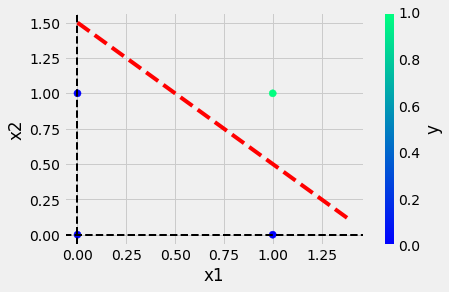

In [155]:
df.plot(kind = 'scatter', x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0 ,color="black", linestyle="--", linewidth=2)

x = np.linspace(0, 1.4) # >>> 50 
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50 

plt.plot(x, y, "r--")

plt.show()